# european soccer game 

In [4]:
#imports

import numpy as np   #linear algebra
import pandas as pd   #data processing
import sqlite3
import matplotlib.pyplot as plt


path = "C://Users//sajjan thood//Desktop//database.sqlite//db.sqlite" 
database = path



In [5]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT * 
                        FROM sqlite_master
                        WHERE type = 'table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


# List of countries

In [6]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


# list of leagues and their country

In [7]:
leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


# list of teams

In [8]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


# List of matches

In [9]:
detailed_matches = pd.read_sql("""SELECT Match.id,
                                        Country.name AS country_name,
                                        League.name AS league_name,
                                        season,
                                        stage,
                                        date,
                                        HT.team_long_name AS home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal,
                                        away_team_goal
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", conn)
detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


# some data analysis 

In [13]:
leagues_by_season = pd.read_sql("""SELECT Country.name AS country_name,
                                        League.name AS league_name,
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scores,
                                        avg(away_team_goal) AS avg_away_team_goals,
                                        avg(home_team_goal-away_team_goal) AS avg_goal_diff,
                                        avg(home_team_goal+away_team_goal) AS avg_goals,
                                        sum(home_team_goal+away_team_goal) AS total_goals
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy','England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC;""", conn)
leagues_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scores,avg_away_team_goals,avg_goal_diff,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


<AxesSubplot:title={'center':'Average Goals per game Over Time'}>

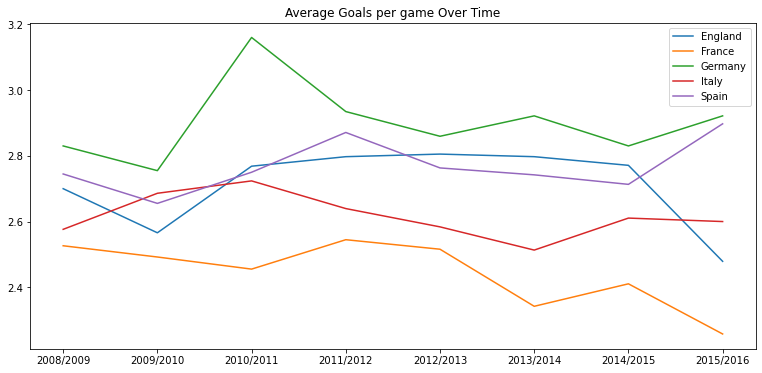

In [20]:
df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), columns=leagues_by_season['country_name'].unique())
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(13,6),title='Average Goals per game Over Time')

<AxesSubplot:title={'center':'Average Goals Difference Home vs Out'}>

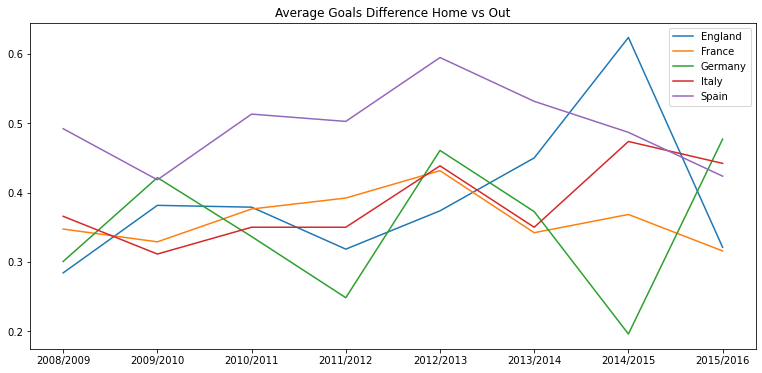

In [21]:
df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()),columns=leagues_by_season['country_name'].unique())
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany','avg_goal_diff'])
df.loc[:,'England'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='England','avg_goal_diff'])
df.loc[:,'Italy'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Italy','avg_goal_diff'])
df.loc[:,'Spain'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_goal_diff'])
df.loc[:,'France'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='France','avg_goal_diff'])

df.plot(figsize=(13,6),title= 'Average Goals Difference Home vs Out')

In [22]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height,
                                        COUNT(height) AS distribution,
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_potential,
                                        AVG(weight) AS avg_weight
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id,
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.Player_api_id)
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                                        GROUP BY calc_height
                                        ORDER BY calc_height;""", conn)
players_height

,calc_height,distribution,avg_potential,avg_weight
0,165.0,74,67.365543,139.459459
1,168.0,118,67.500518,144.127119
2,170.0,403,67.726903,147.799007
3,173.0,530,66.980272,152.824528
4,175.0,1188,66.805204,156.111953
5,178.0,1489,66.367212,160.665547
6,180.0,1388,66.419053,165.261527
7,183.0,1954,66.634380,170.167861
8,185.0,1278,66.928964,174.636933
9,188.0,1305,67.094253,179.278161


In [38]:
league1 = detailed_matches[['home_team', 'home_team_goal', 'league_name']]
league2 = detailed_matches[['away_team', 'away_team_goal', 'league_name']]

totalleague = pd.DataFrame(np.concatenate((
    league1.values, league2.values), axis=0))
totalleague.columns = ['team', 'goals', 'league_name']

leagueSummary = totalleague.groupby('team')[['goals', 'league_name']].sum()
standing= leagueSummary.sort_values(by='league_name', ascending=False)

standing

,goals,league_name
team,,
Athletic Club de Bilbao,1,Spain LIGA BBVA
Atlético Madrid,4,Spain LIGA BBVA
Valencia CF,3,Spain LIGA BBVA
UD Almería,3,Spain LIGA BBVA
Sevilla FC,1,Spain LIGA BBVA
Real Valladolid,0,Spain LIGA BBVA
Real Sporting de Gijón,1,Spain LIGA BBVA
Real Madrid CF,1,Spain LIGA BBVA
Real Betis Balompié,0,Spain LIGA BBVA


# THANKYOU
